In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

In [390]:
#Importing the datasets
Application_Data = pd.read_csv('./application_data.csv')
Previous_Application = pd.read_csv('./previous_application.csv')

In [391]:
#Reading the first 5 Rows of the data
Application_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
Previous_Application.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
#shape of the data
print("shape of application data" , Application_Data.shape)
print("shape of previous application data", Previous_Application.shape)

shape of application data (307511, 122)
shape of previous application data (1048575, 37)


In [394]:
#Database size
print("The size of Application_data:",Application_Data.size)
print("The size of Previous_Application:",Previous_Application.size)

The size of Application_data: 37516342
The size of Previous_Application: 38797275


In [395]:
#Column data types
Application_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [396]:
Previous_Application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [397]:
#Checking the Numeric Variables 
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [398]:
Previous_Application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,...,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,...,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,...,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,...,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,...,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [399]:
# Percentage of null values in each column of Application_Data
null_counts = Application_Data.isnull().sum()
total_counts = Application_Data.shape[0]
null_percentage = (null_counts/total_counts)*100
null_percentage

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

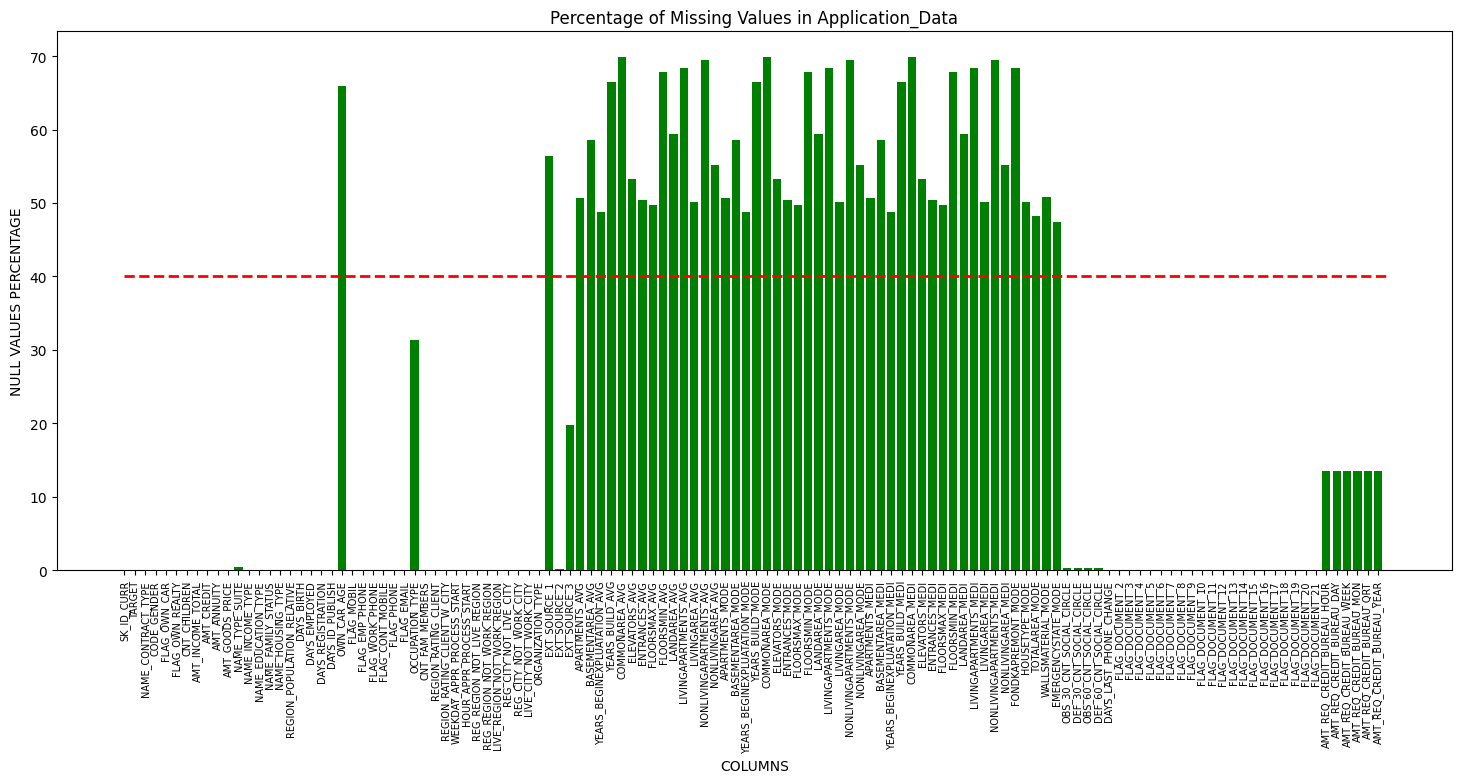

In [400]:
#Plotting in a Graph
null_Application = pd.DataFrame((Application_Data.isnull().sum())*100/Application_Data.shape[0]).reset_index()
null_Application.columns = ['column name', 'null percentage value']
fig = plt.figure(figsize= (18,7))
ax = plt.bar( null_Application['column name'], null_Application['null percentage value'], color='green')
plt.xticks(rotation =90,fontsize =7)
plt.hlines(y= 40, xmin= 0, xmax= 122, color='red', linestyle ='dashed', linewidth = 2)
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [401]:
#Checking the columns which have more than 40% missing values
app_data_null_40 = null_Application[null_Application['null percentage value'] > 40]
app_data_null_40

,column name,null percentage value
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [402]:
print('Number of Columns that have missing values greater than 40% :', len(app_data_null_40))


Number of Columns that have missing values greater than 40% : 49


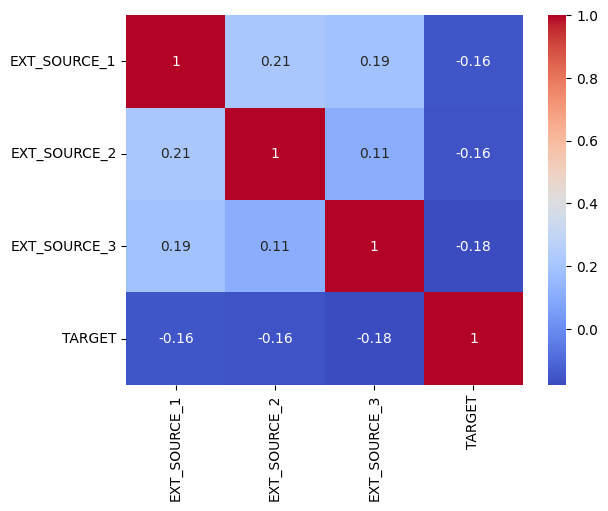

In [403]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = Application_Data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="coolwarm")

In [404]:
# create a list of columns that needs to be dropped including the columns with > 40% null values
drop_column = app_data_null_40['column name'].tolist() + ['EXT_SOURCE_2', 'EXT_SOURCE_3']
#not adding EXT_SOURCE_1 column because already included in app_data_null_40 
len(drop_column)

51

In [405]:
flag=[col for col in Application_Data.columns if "FLAG_DOCUMENT" in col]
flag

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
df_flag = Application_Data[flag + ['TARGET']]
df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter", 0:"Non defaulter"})

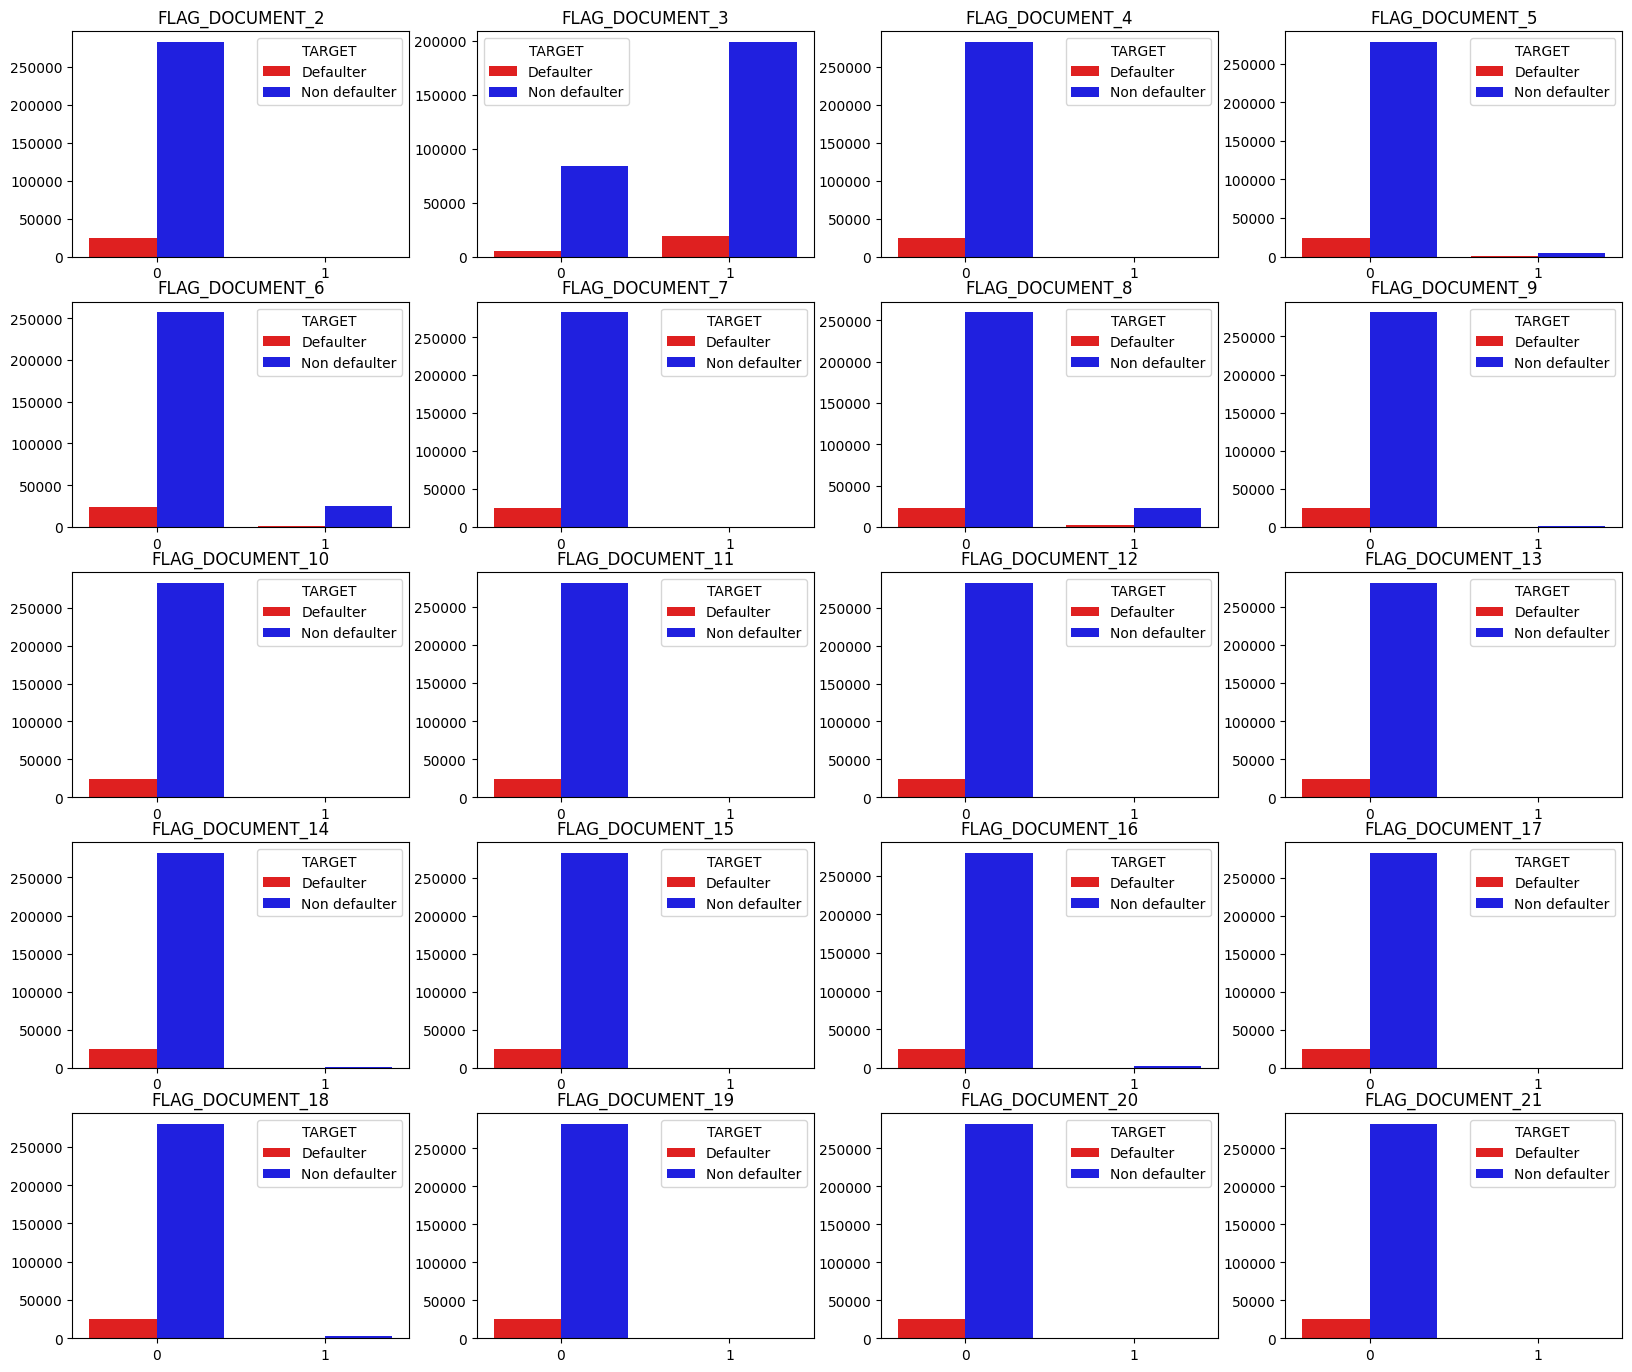

In [407]:
# Checking the relevance of Flag column and whether it has any relation with loan repayment status
plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=df_flag[i], hue = df_flag["TARGET"], palette = ["r","b"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [408]:
#The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted 
# FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows 
# if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [409]:
flag.remove('FLAG_DOCUMENT_3')
drop_column = drop_column + flag
len(drop_column)

70

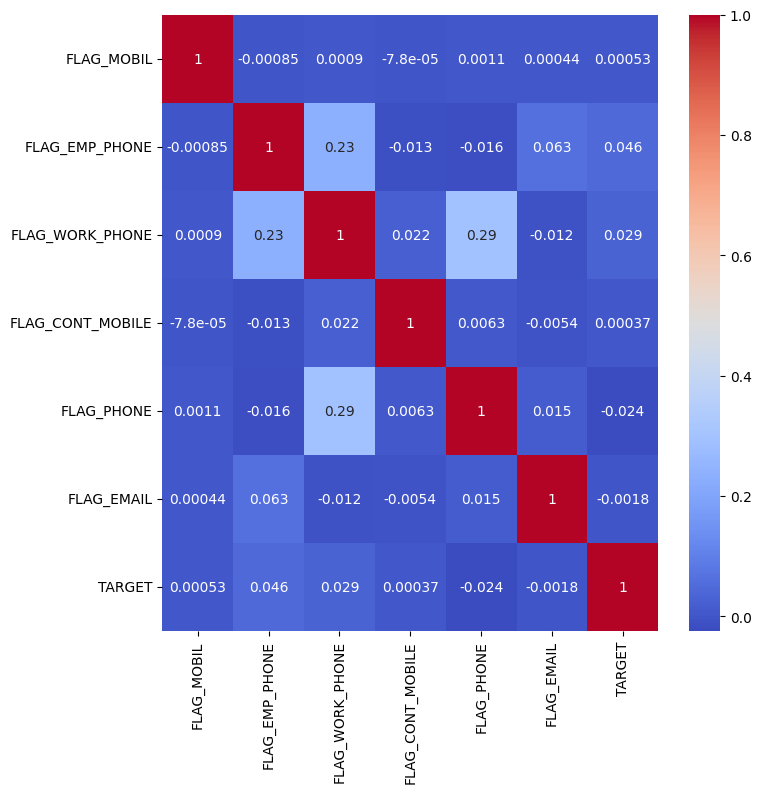

In [410]:
# Checking the correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contact_corr = Application_Data[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="coolwarm")

In [411]:
contact_col.remove('TARGET')
drop_column = drop_column + contact_col
len(drop_column)

76

In [412]:
# Dropping the unnecessary columns from Application_Data
Application_Data.drop(labels=drop_column,axis=1,inplace=True)

In [413]:
#Verifying the shape of the dataframe 
print('New Shape of the Dataframe: ',Application_Data.shape)

New Shape of the Dataframe:  (307511, 46)


In [414]:

# Describing the dataset and observing the changes
Application_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [415]:
# Percentage of null values in each column of Previous_application
null_values = Previous_Application.isnull().sum()
total = Previous_Application.shape[0]
prev_app_null_percentage = (null_values/total)*100
prev_app_null_percentage

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               53.348211
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.348211
RATE_INTEREST_PRIMARY          99.645137
RATE_INTEREST_PRIVILEGED       99.645137
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.127626
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

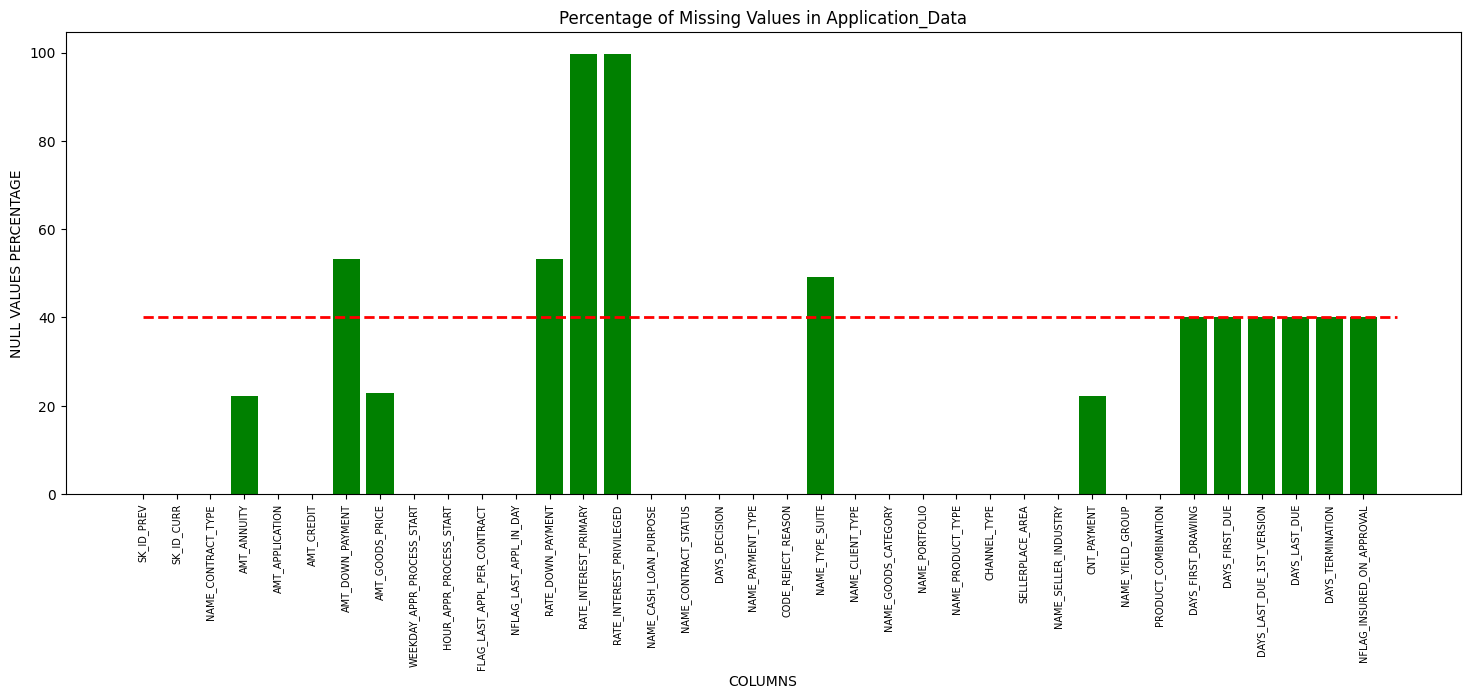

In [416]:
#plotting in a graph
null_previous = pd.DataFrame(Previous_Application.isnull().sum()*100/Previous_Application.shape[0]).reset_index()
null_previous.columns = ['column name', 'null values']
fig = plt.figure(figsize=(18,6))
ax = plt.bar( null_previous['column name'], null_previous['null values'], color='green')
plt.xticks(rotation =90,fontsize =7)
plt.hlines(y= 40, xmin= 0, xmax= 37, color='red', linestyle ='dashed', linewidth = 2)
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [417]:
#Checking the columns which have more than 40% missing values
prev_app_null_40 = null_previous[null_previous['null values'] > 40]
prev_app_null_40

,column name,null values
6,AMT_DOWN_PAYMENT,53.348211
12,RATE_DOWN_PAYMENT,53.348211
13,RATE_INTEREST_PRIMARY,99.645137
14,RATE_INTEREST_PRIVILEGED,99.645137
20,NAME_TYPE_SUITE,49.127626
31,DAYS_FIRST_DRAWING,40.121880
32,DAYS_FIRST_DUE,40.121880
33,DAYS_LAST_DUE_1ST_VERSION,40.121880
34,DAYS_LAST_DUE,40.121880
35,DAYS_TERMINATION,40.121880


In [418]:
print('Number of Columns that have missing values greater than 40% :', len(prev_app_null_40))

Number of Columns that have missing values greater than 40% : 11


In [419]:
#checking more columns which can be dropped, that are not needed for analysis
Unnecessary_column = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
new_previous = prev_app_null_40['column name'].tolist()
new_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [420]:
new_previous = new_previous + Unnecessary_column
len(new_previous)

15

In [421]:
# Dropping the unnecessary columns from Previous_Application
Previous_Application.drop(labels= new_previous, axis= 1, inplace= True)

In [422]:
#Verifying the shape of the dataframe 
print('New Shape of the Dataframe: ',Previous_Application.shape)

New Shape of the Dataframe:  (1048575, 22)


In [423]:
# Describing the dataset and observing the changes
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1048575 non-null  int64  
 1   SK_ID_CURR              1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE      1048575 non-null  object 
 3   AMT_ANNUITY             815566 non-null   float64
 4   AMT_APPLICATION         1048575 non-null  float64
 5   AMT_CREDIT              1048575 non-null  float64
 6   AMT_GOODS_PRICE         807610 non-null   float64
 7   NAME_CASH_LOAN_PURPOSE  1048575 non-null  object 
 8   NAME_CONTRACT_STATUS    1048575 non-null  object 
 9   DAYS_DECISION           1048575 non-null  int64  
 10  NAME_PAYMENT_TYPE       1048575 non-null  object 
 11  CODE_REJECT_REASON      1048575 non-null  object 
 12  NAME_CLIENT_TYPE        1048575 non-null  object 
 13  NAME_GOODS_CATEGORY     1048575 non-null  object 
 14  NA

In [424]:
# Converting Negative days to Positive days as days cannot be negative

days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in days_col:
    Application_Data[col] = abs(Application_Data[col])

In [425]:
#checking duplicate rows
duplicate = Previous_Application[Previous_Application.duplicated()]
duplicate

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


In [426]:
#chceking duplicate rows
duplicated  = Application_Data[Application_Data.duplicated()]
duplicated

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [427]:
# checking the null value % of each column in Application_Data dataframe
Impute_col = round((Application_Data.isnull().sum()/ Application_Data.shape[0])*100,2)
Impute_col

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [428]:
#collect all the columns with impute/improper data
Impute_col_list = Impute_col[Impute_col>0].index.tolist()
print('list of columns where we need to fill missing values', Impute_col_list)

list of columns where we need to fill missing values ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [429]:
#observing all the rows with null values
null_data = Application_Data[Application_Data.isnull().any(axis=1)]
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,2.0,0.0,-1673.0,0,NaN,NaN,NaN,NaN,NaN,NaN
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0.0,0.0,-2396.0,0,0.0,0.0,0.0,0.0,0.0,2.0
14,100018,0,Cash loans,F,N,Y,0,189000.000,773680.5,32778.0,...,0.0,0.0,-188.0,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456245,0,Cash loans,F,N,Y,3,81000.000,269550.0,11871.0,...,2.0,1.0,-448.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307504,456248,0,Cash loans,F,N,Y,0,153000.000,331920.0,16096.5,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.000,254700.0,27558.0,...,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
Application_Data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [431]:
Application_Data['NAME_TYPE_SUITE'].fillna((Application_Data['NAME_TYPE_SUITE'].mode()[0]), inplace=True)

In [432]:
Application_Data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [433]:
Application_Data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [434]:
Application_Data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [435]:
Amount = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in Amount:
    Application_Data[col].fillna(Application_Data[col].median(),inplace= True)

In [436]:
#imputing null values in previous application
impute_prev_col = round((Previous_Application.isnull().sum()/ Previous_Application.shape[0])*100,2)
impute_prev_col

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.22
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           22.98
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.22
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
dtype: float64

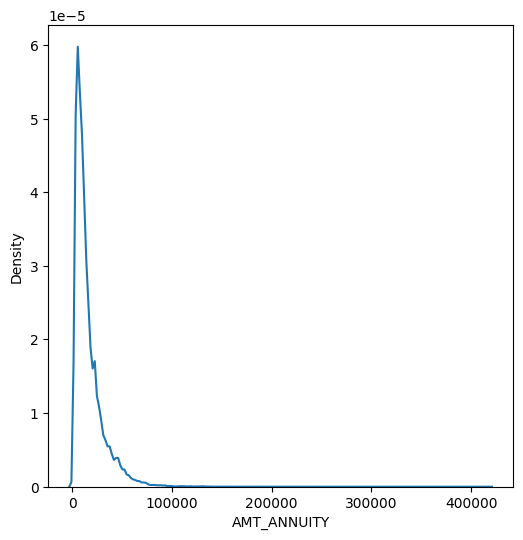

In [437]:
plt.figure(figsize= (6,6))
sns.kdeplot(Previous_Application['AMT_ANNUITY'])
plt.show()

In [438]:
Previous_Application['AMT_ANNUITY'].fillna(Previous_Application['AMT_ANNUITY'].median(),inplace= True)

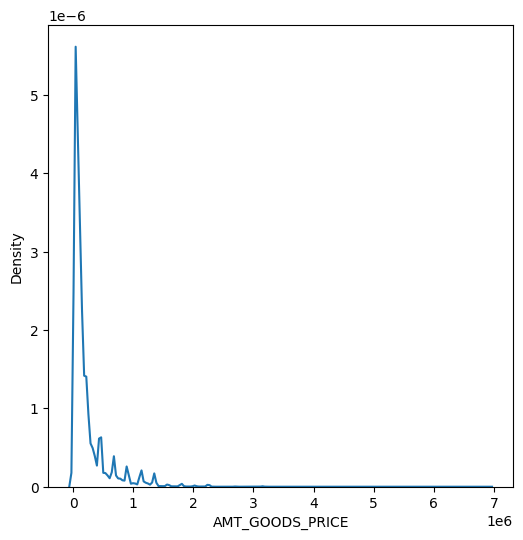

In [439]:
plt.figure(figsize= (6,6))
sns.kdeplot(Previous_Application['AMT_GOODS_PRICE'])
plt.show()

In [440]:
Previous_Application['AMT_GOODS_PRICE'].fillna(Previous_Application['AMT_GOODS_PRICE'].median(),inplace= True)

In [441]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.
Previous_Application.loc[Previous_Application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()


NAME_CONTRACT_STATUS
Canceled        191156
Refused          25655
Unused offer     16192
Approved             3
Name: count, dtype: int64

In [442]:
#imputing null values as 0
Previous_Application['CNT_PAYMENT'].fillna(0,inplace = True)

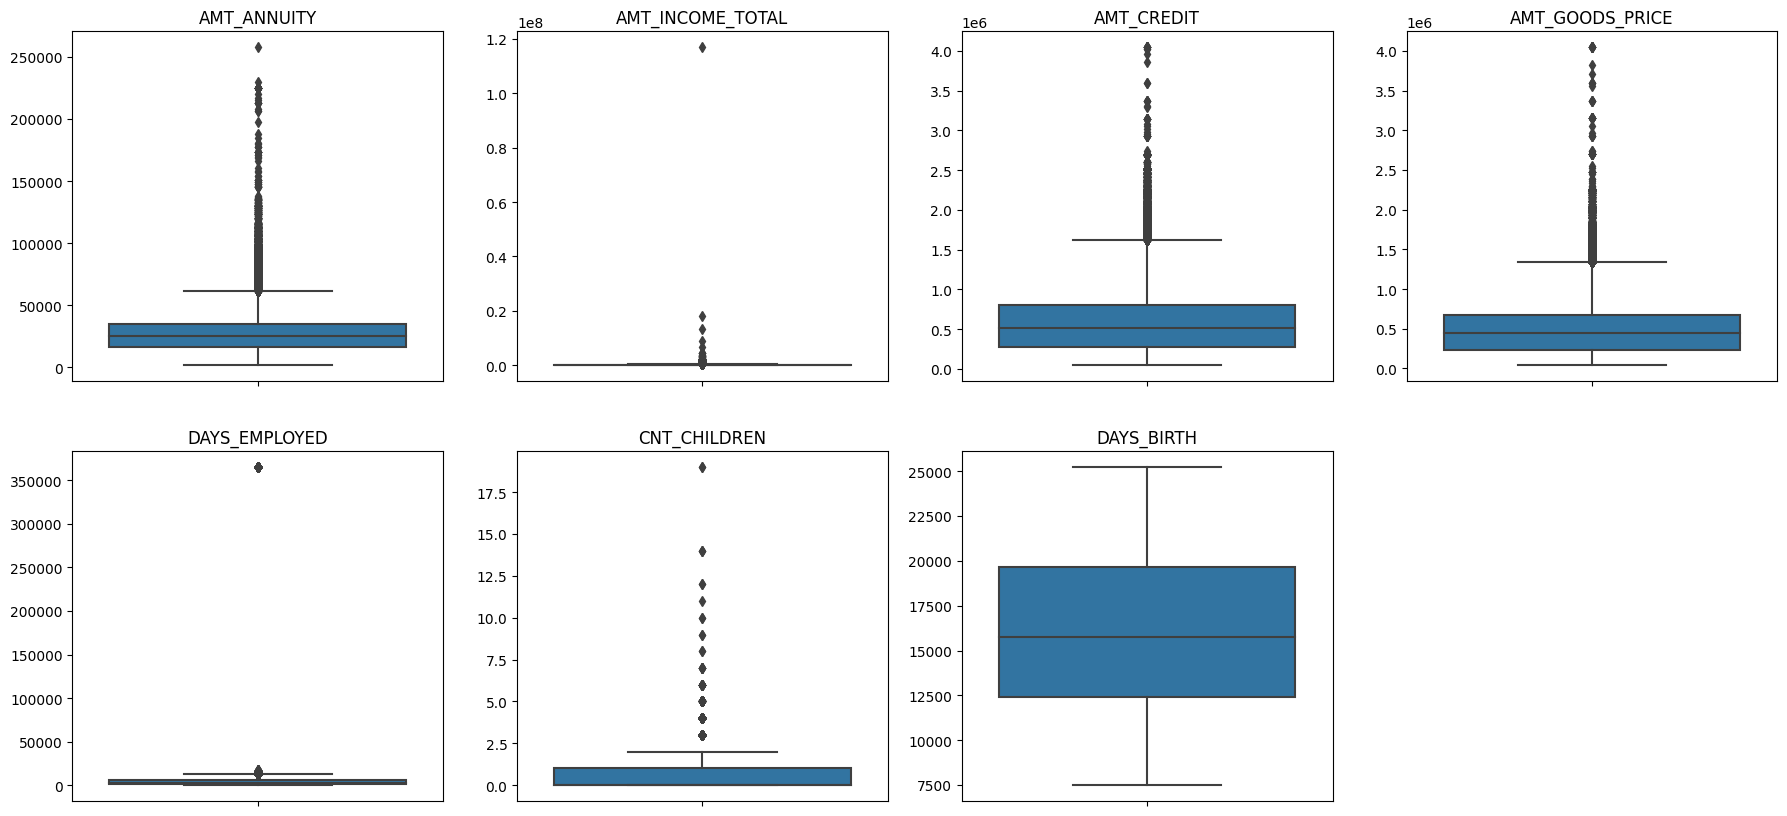

In [443]:
#checking the outliers in application data
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [444]:
Application_Data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,3.075110e+05,3.075110e+05,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979e+05,5.990260e+05,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231e+05,4.024908e+05,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,2.565000e+04,4.500000e+04,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000e+05,2.700000e+05,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500e+05,5.135310e+05,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000e+05,8.086500e+05,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1.170000e+08,4.050000e+06,4.050000e+06,25229.000000,19.000000,365243.000000


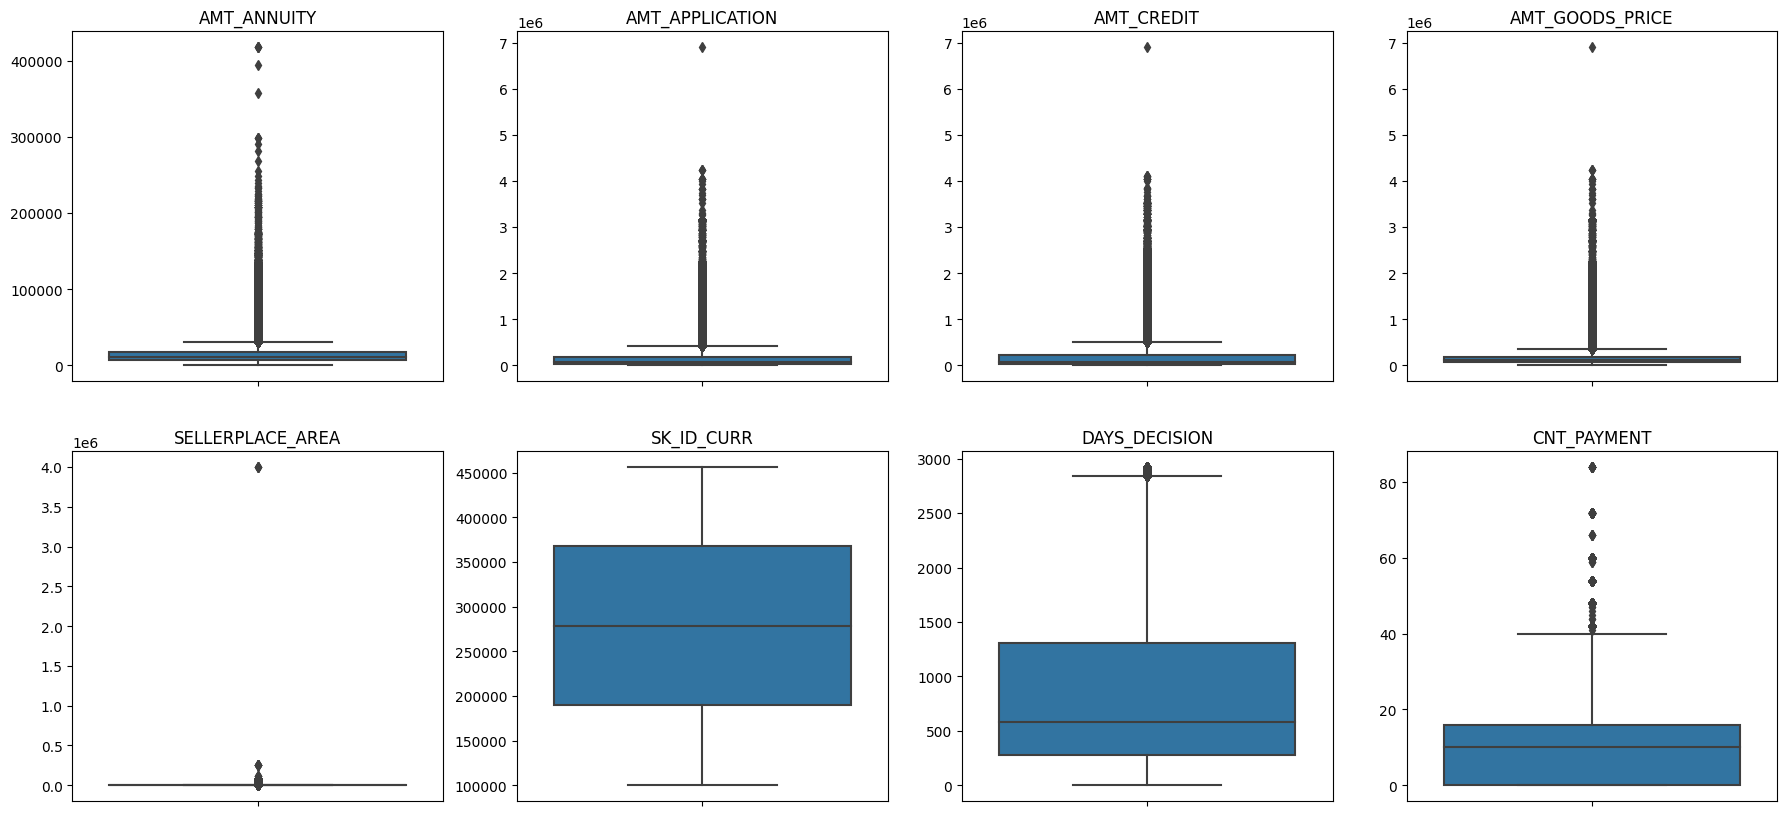

In [445]:
#finding outlier in previous application
Previous_Application['DAYS_DECISION'] = abs(Previous_Application['DAYS_DECISION'])
prev_outlier_col =['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA',
                   'SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

fig = plt.figure(figsize=(22,10))
for i in enumerate(prev_outlier_col):
    plt.subplot(2, 4, i[0] + 1)
    sns.boxplot(y = Previous_Application[i[1]])
    plt.ylabel('')
    plt.title(i[1])
    

In [446]:
Previous_Application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.485991e+04,1.742698e+05,1.950000e+05,1.999131e+05,3.183904e+02,1.244121e+01,8.820381e+02
std,1.314679e+04,2.910789e+05,3.169407e+05,2.792916e+05,7.996734e+03,1.441992e+01,7.792649e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000e+00
25%,7.506765e+03,1.890000e+04,2.427750e+04,6.745500e+04,-1.000000e+00,0.000000e+00,2.810000e+02
50%,1.125000e+04,7.081650e+04,8.025300e+04,1.115116e+05,4.000000e+00,1.000000e+01,5.830000e+02
75%,1.673721e+04,1.800000e+05,2.152395e+05,1.800000e+05,8.500000e+01,1.600000e+01,1.303000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


   TARGET   count
0       0  282686
1       1   24825


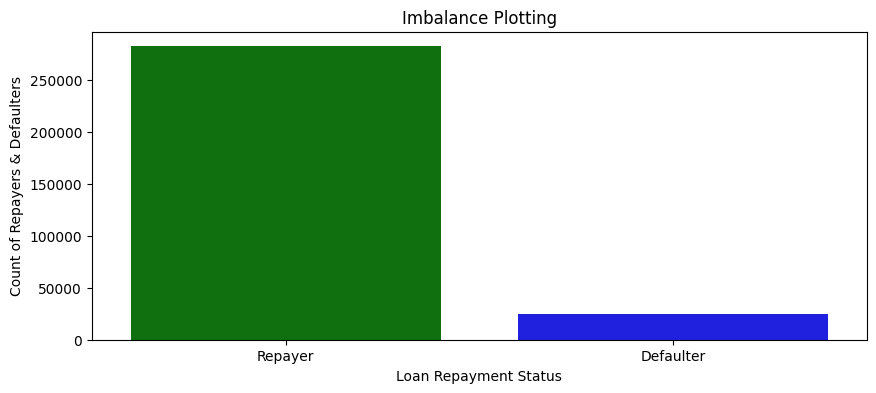

In [447]:
#DATA Imbalance
Imbalance = Application_Data["TARGET"].value_counts().reset_index()
print(Imbalance)
plt.figure(figsize=(10, 4))
x = ['Repayer', 'Defaulter']
sns.barplot(x=x, y="count", data=Imbalance, palette=['g', 'b'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [448]:
count_of_0 = Imbalance.iloc[0]["count"]
count_of_1 = Imbalance.iloc[1]["count"]
print("Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 "%(count_of_0/count_of_1))

Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 


In [449]:

df = Application_Data
def identify_data_type(df):
    categorical_columns = []
    numerical_columns = []
    
    for column in df.columns:
        if df[column].dtype == 'object' or len(df[column].unique()) < 40:
            categorical_columns.append(column)
        else:
            numerical_columns.append(column)
    
    return categorical_columns, numerical_columns


cat_cols, num_cols = identify_data_type(df)

print("Categorical Columns:")
print(cat_cols)
print(len(cat_cols))

print("\nNumerical Columns:")
print(num_cols)
print(len(num_cols))



Categorical Columns:
['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
35

Numerical Columns:
['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_R

 some common functions customized to perform uniform anaysis

In [450]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = Application_Data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Application_Data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,13))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=Application_Data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [451]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [452]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=Application_Data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [453]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [454]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

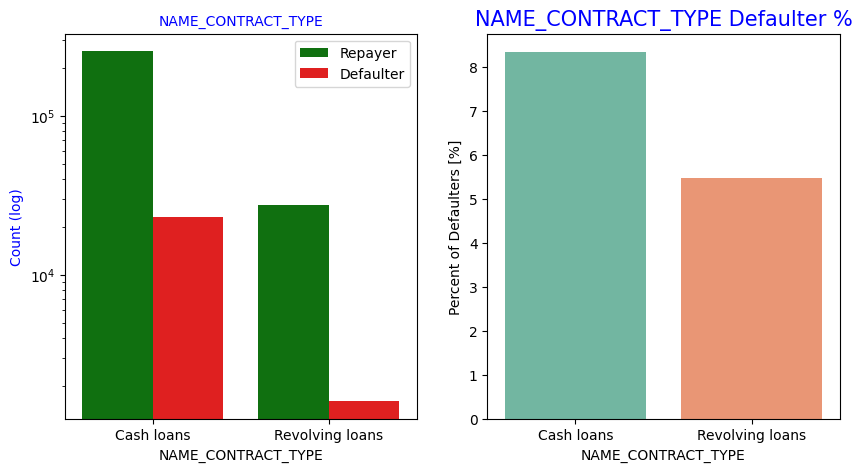

In [455]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

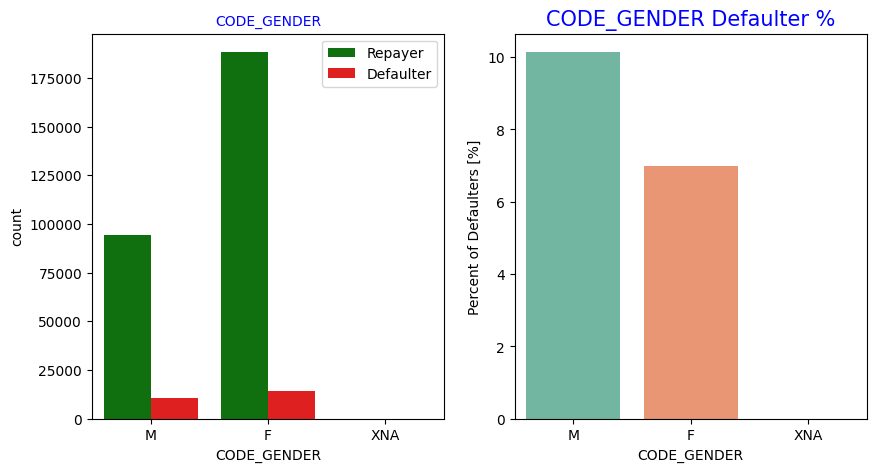

In [456]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

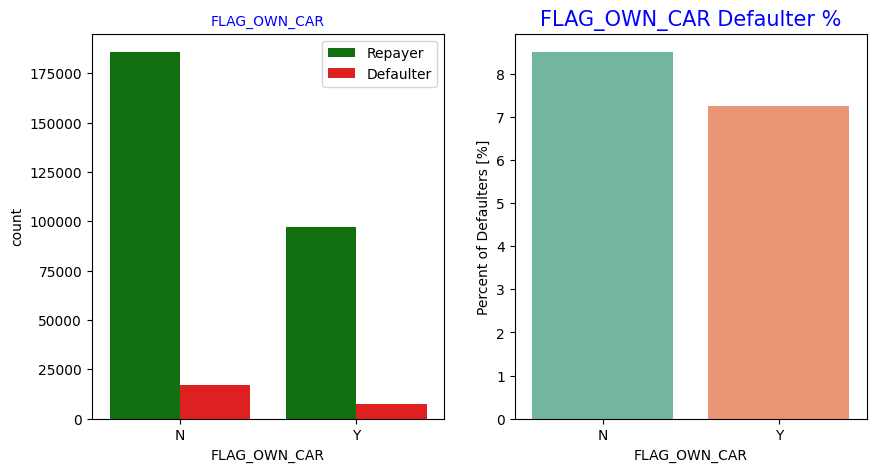

In [457]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

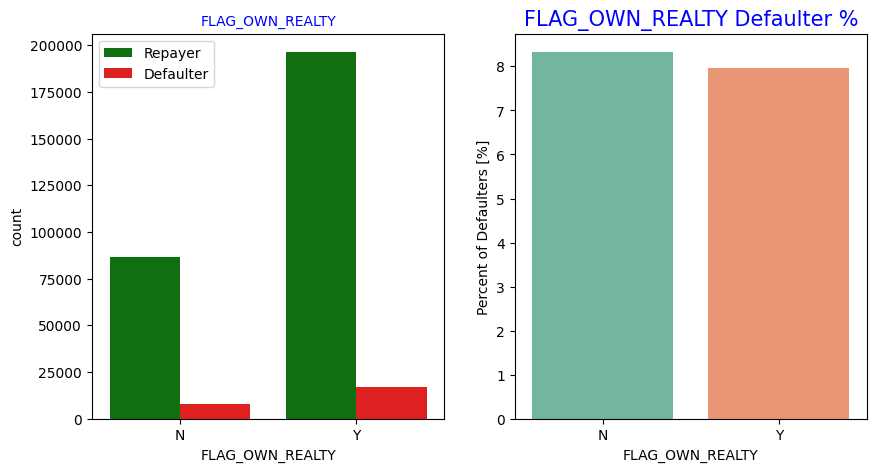

In [458]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

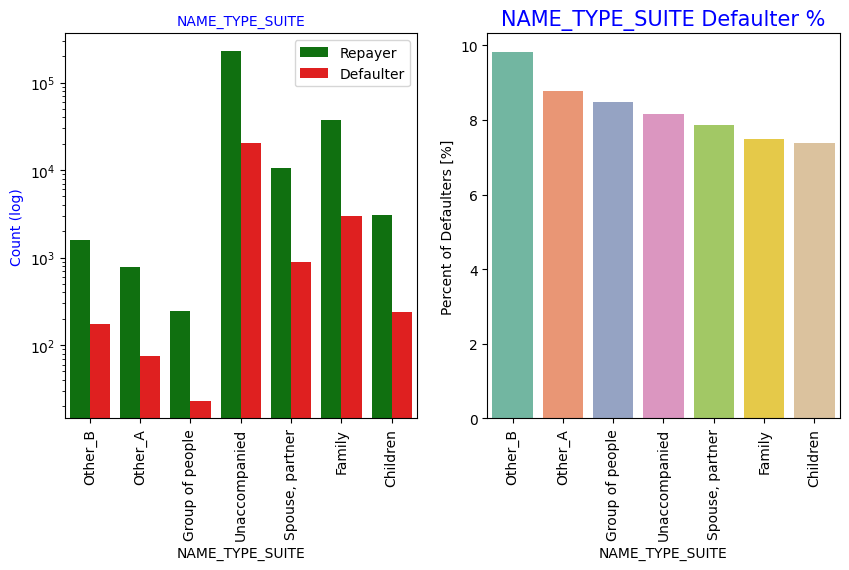

In [459]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_TYPE_SUITE",True,True,True)

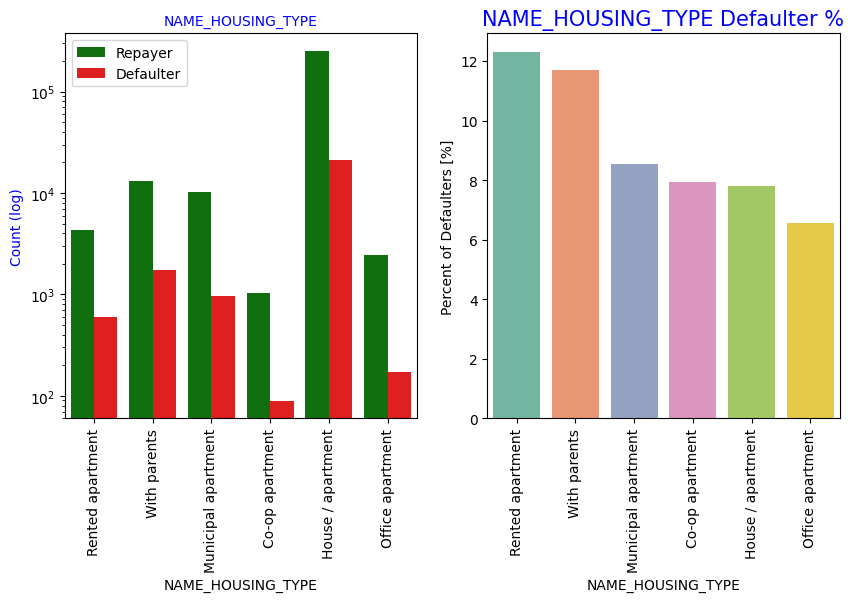

In [460]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)


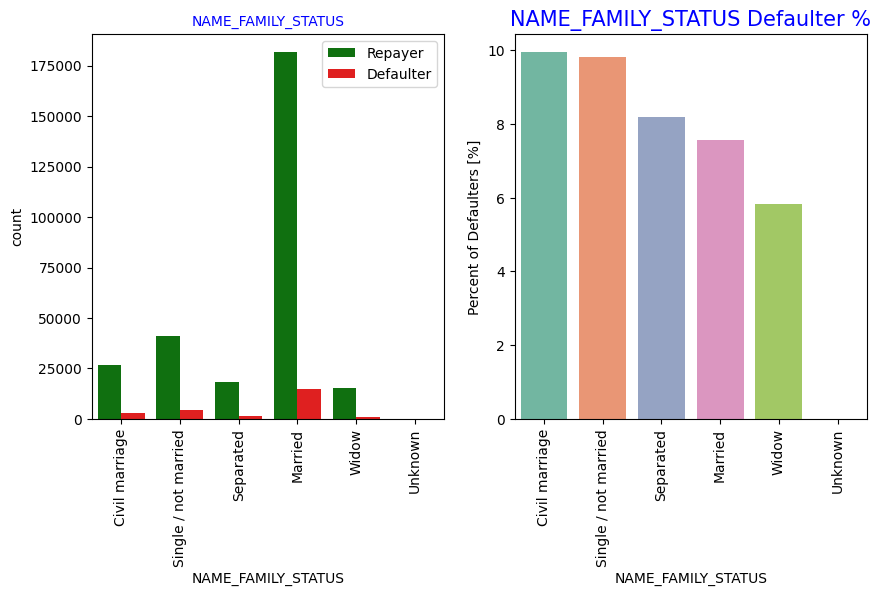

In [461]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

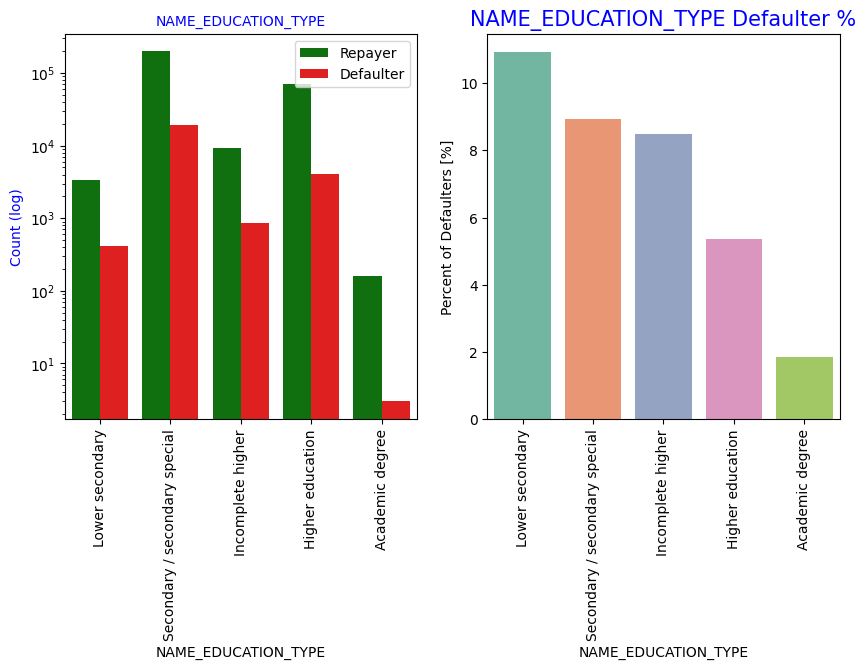

In [462]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

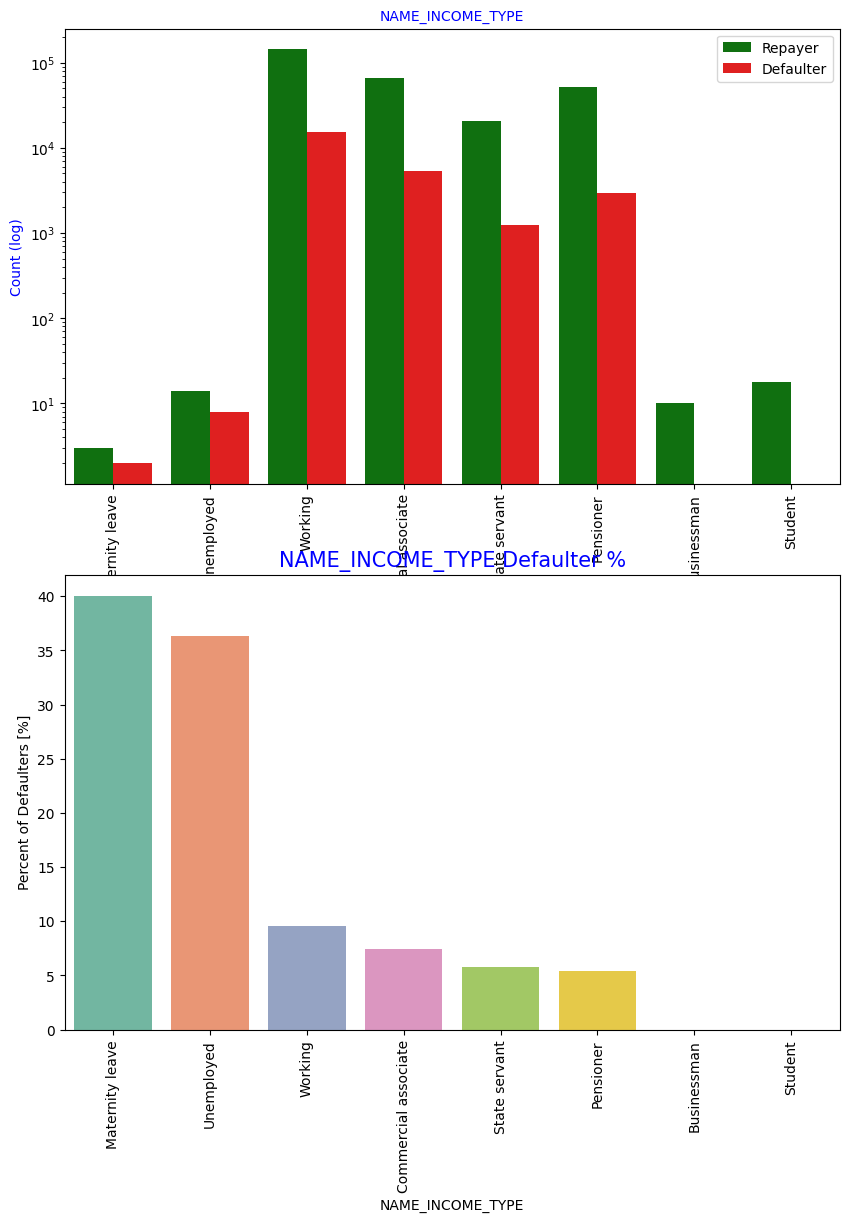

In [463]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

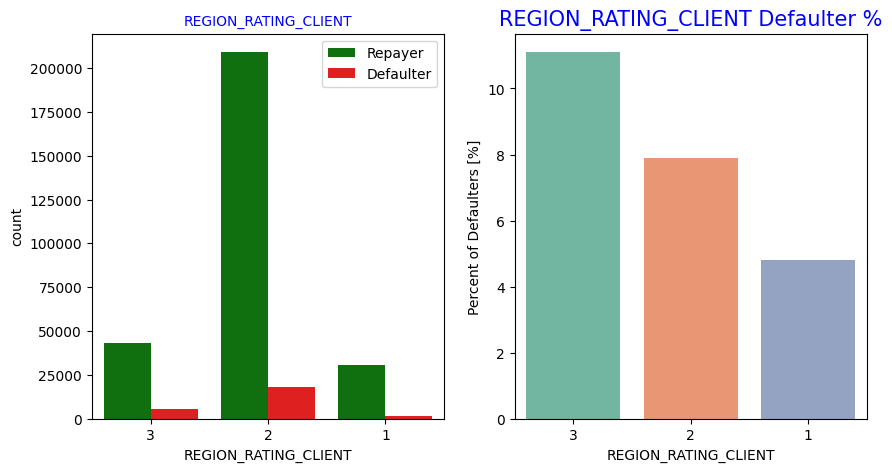

In [464]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

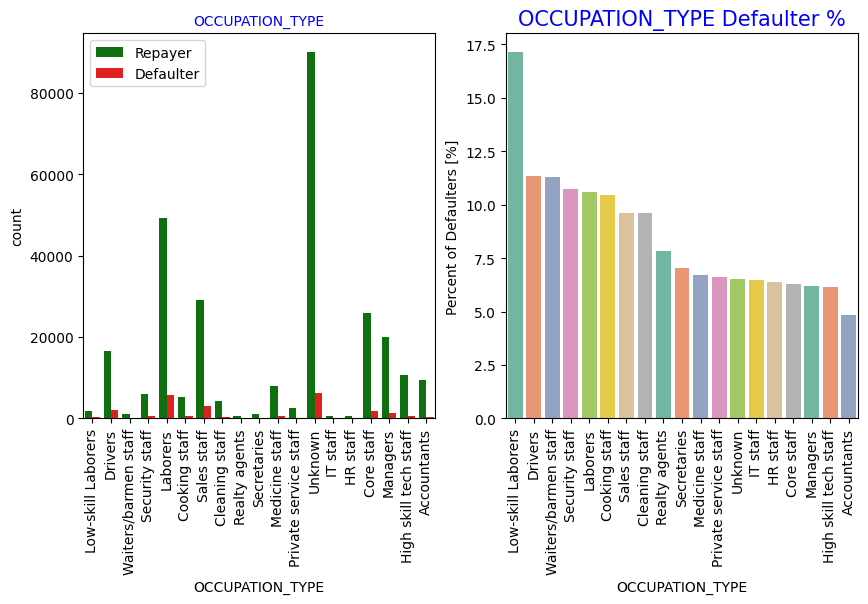

In [465]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,True)

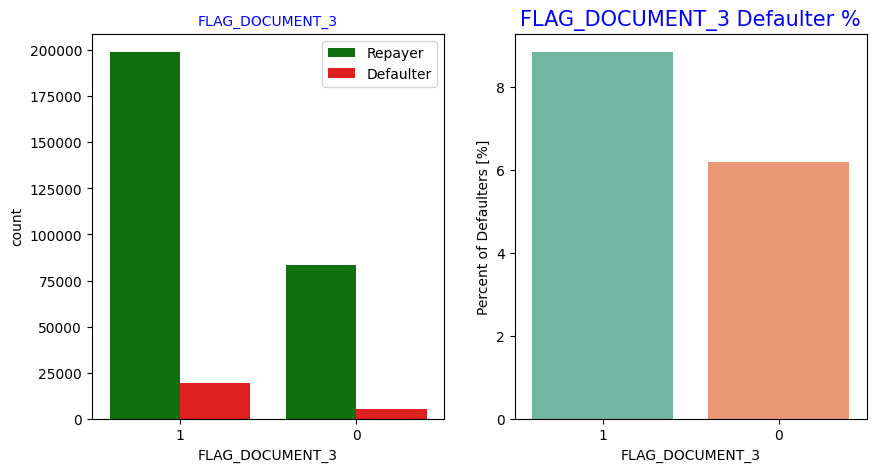

In [466]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

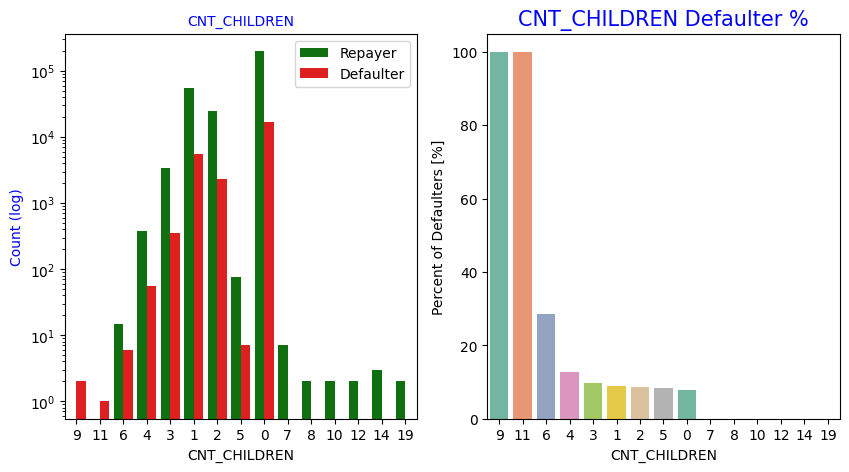

In [467]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

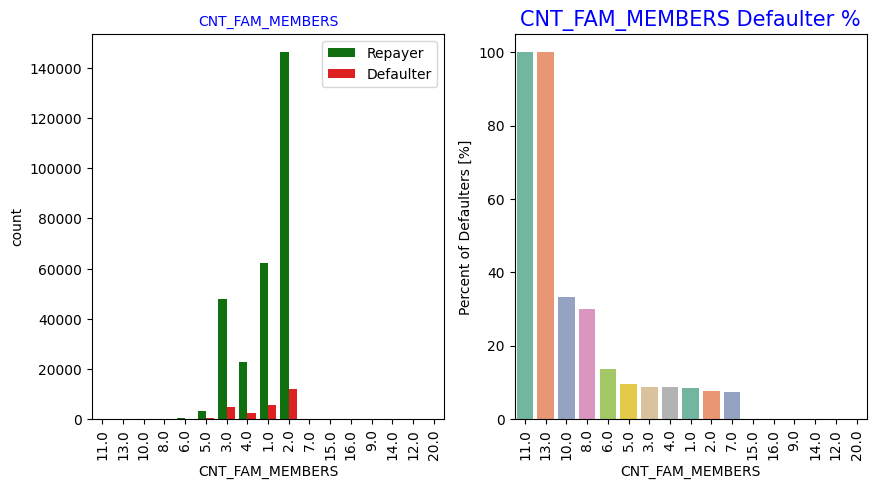

In [468]:
univariate_categorical("CNT_FAM_MEMBERS",False,True)

In [469]:
Application_Data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685943,25650.0,112500.0,135000.0,202500.0,117000000.0


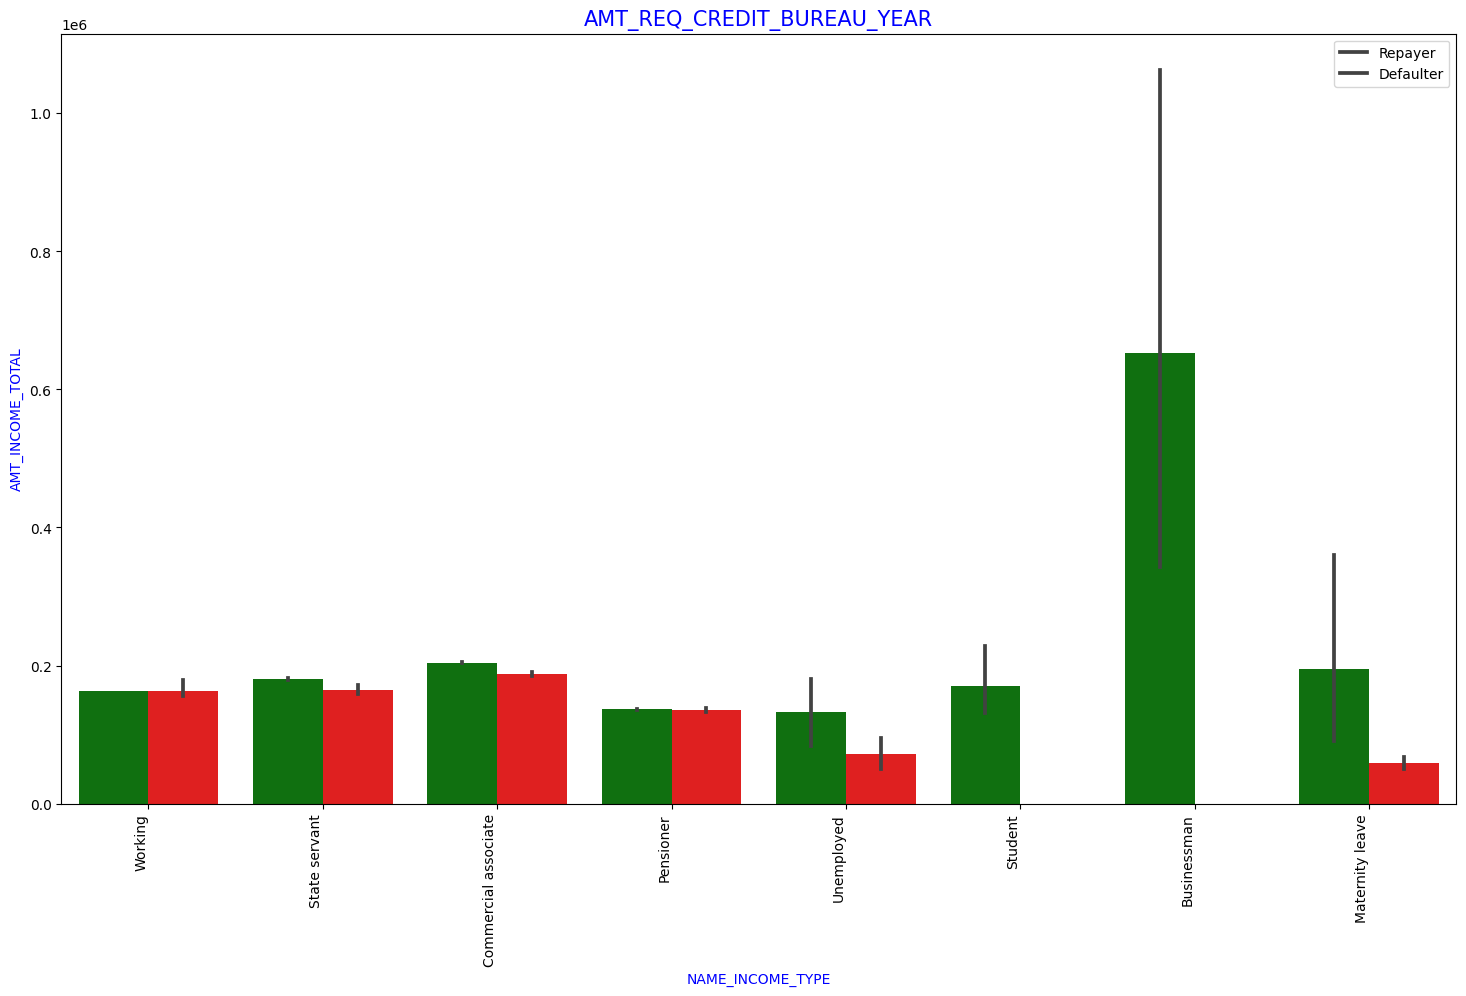

In [470]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",Application_Data,"TARGET",(18,10))

It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs.

#Correlation Analysis

In [471]:
Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [472]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
corr_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = Application_Data.loc[Application_Data['TARGET']==0, corr_cols] # Repayers
Defaulter_df = Application_Data.loc[Application_Data['TARGET']==1, corr_cols] # Defaulters

In [473]:
# Getting the top 10 correlation for the Repayers data
numeric_columns = Repayer_df.select_dtypes(include=[np.number]).columns
corr_repayer = Repayer_df[numeric_columns].corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape), k=1).astype(np.bool_))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df_repayer.dropna(subset=["Correlation"], inplace=True)
corr_df_repayer["Correlation"] = corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
top_10_corr_repayer = corr_df_repayer.head(10)

print(top_10_corr_repayer)


                            VAR1                        VAR2  Correlation
122              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
371  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
300              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
495  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
588      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
123              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
92                   AMT_ANNUITY                  AMT_CREDIT     0.771309
216                DAYS_EMPLOYED                  DAYS_BIRTH     0.626114
335         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
365  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301


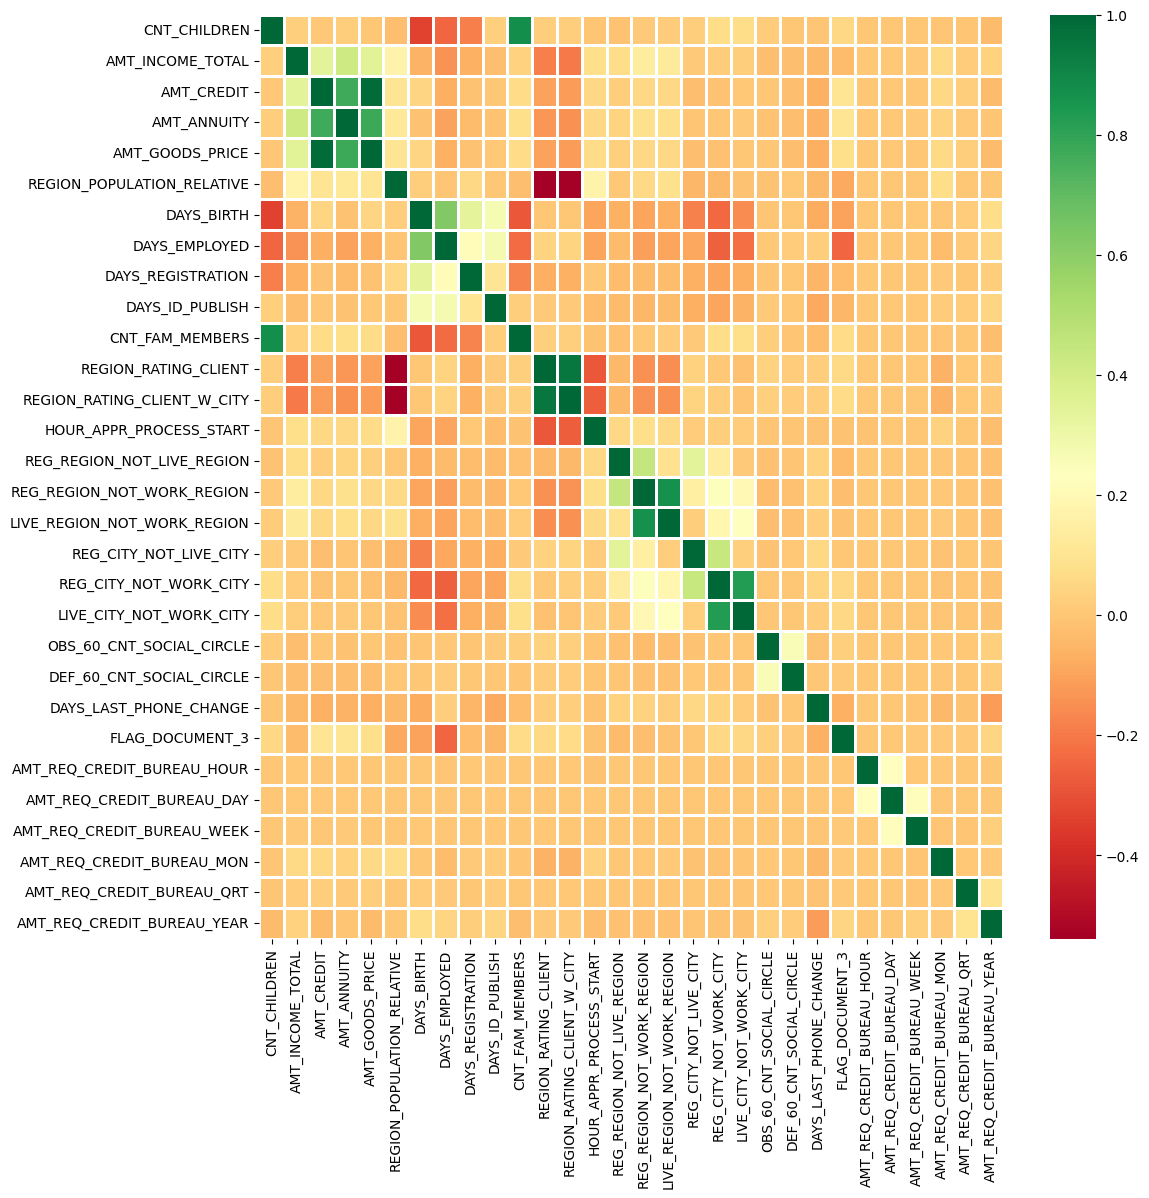

In [474]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df[numeric_columns].corr(), cmap="RdYlGn",annot=False,linewidth =1)

Credit amount is highly correlated with
amount of goods price
loan annuity
total income
We can also see that repayers have high correlation in number of days employed.

In [475]:
# Getting the top 10 correlation for the Defaulter data
numeric_columns = Defaulter_df.select_dtypes(include=[np.number]).columns
corr_Defaulter = Defaulter_df[numeric_columns].corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape), k=1).astype(np.bool_))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df_Defaulter.dropna(subset=["Correlation"], inplace=True)
corr_df_Defaulter["Correlation"] = corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
top_10_corr_Defaulter = corr_df_Defaulter.head(10)

print(top_10_corr_Defaulter)


                            VAR1                        VAR2  Correlation
122              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
371  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
300              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
495  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
588      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
123              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
92                   AMT_ANNUITY                  AMT_CREDIT     0.752195
216                DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
464   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937
557       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.472052


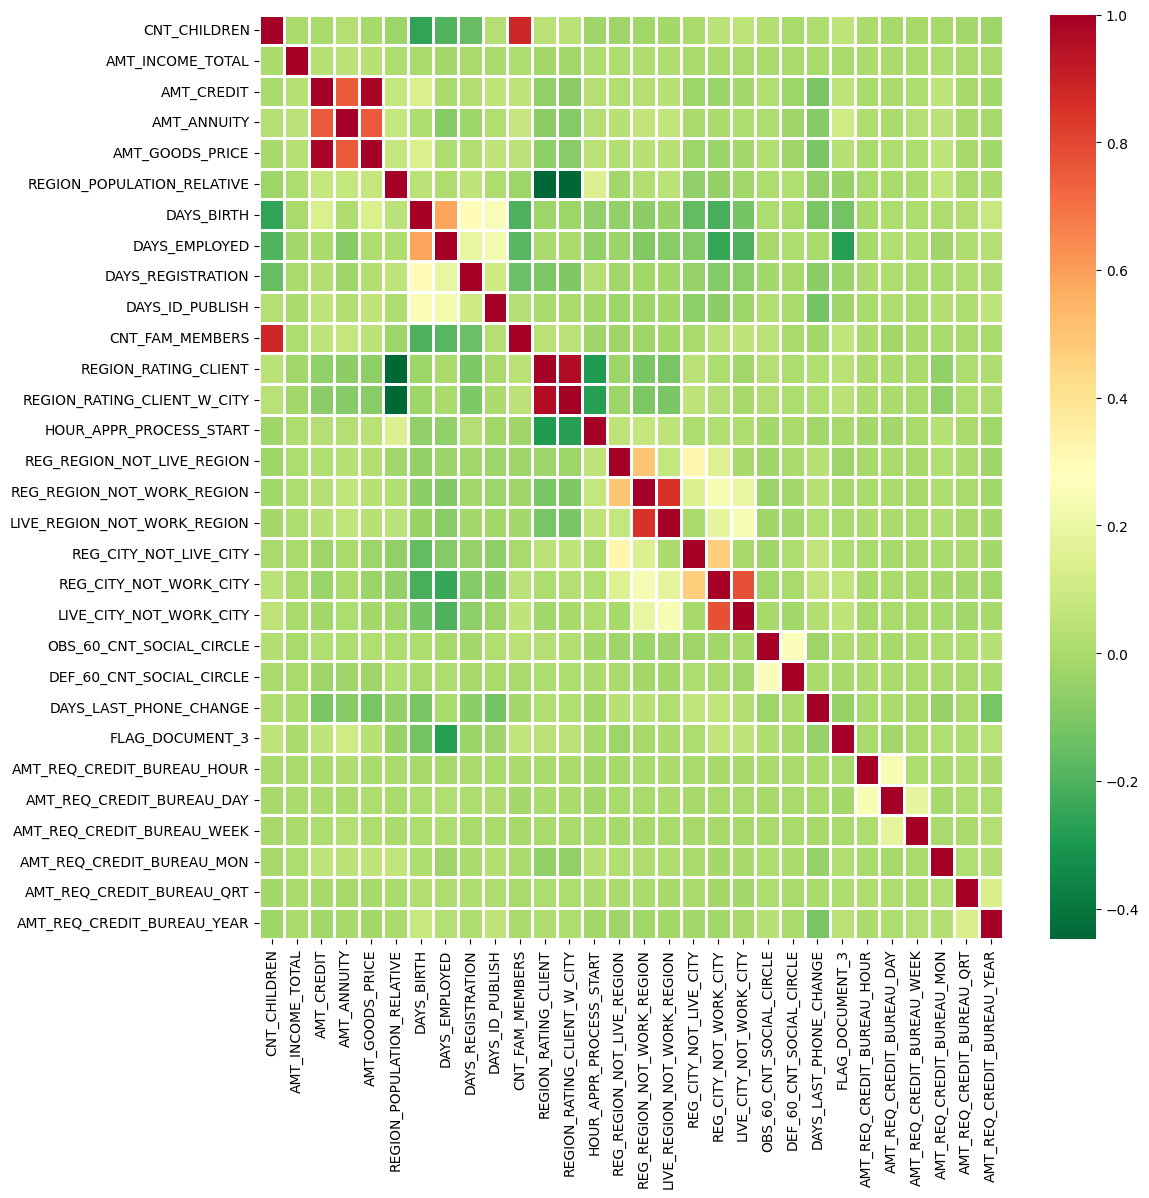

In [476]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df[numeric_columns].corr(), cmap="RdYlGn_r",annot=False,linewidth =1)

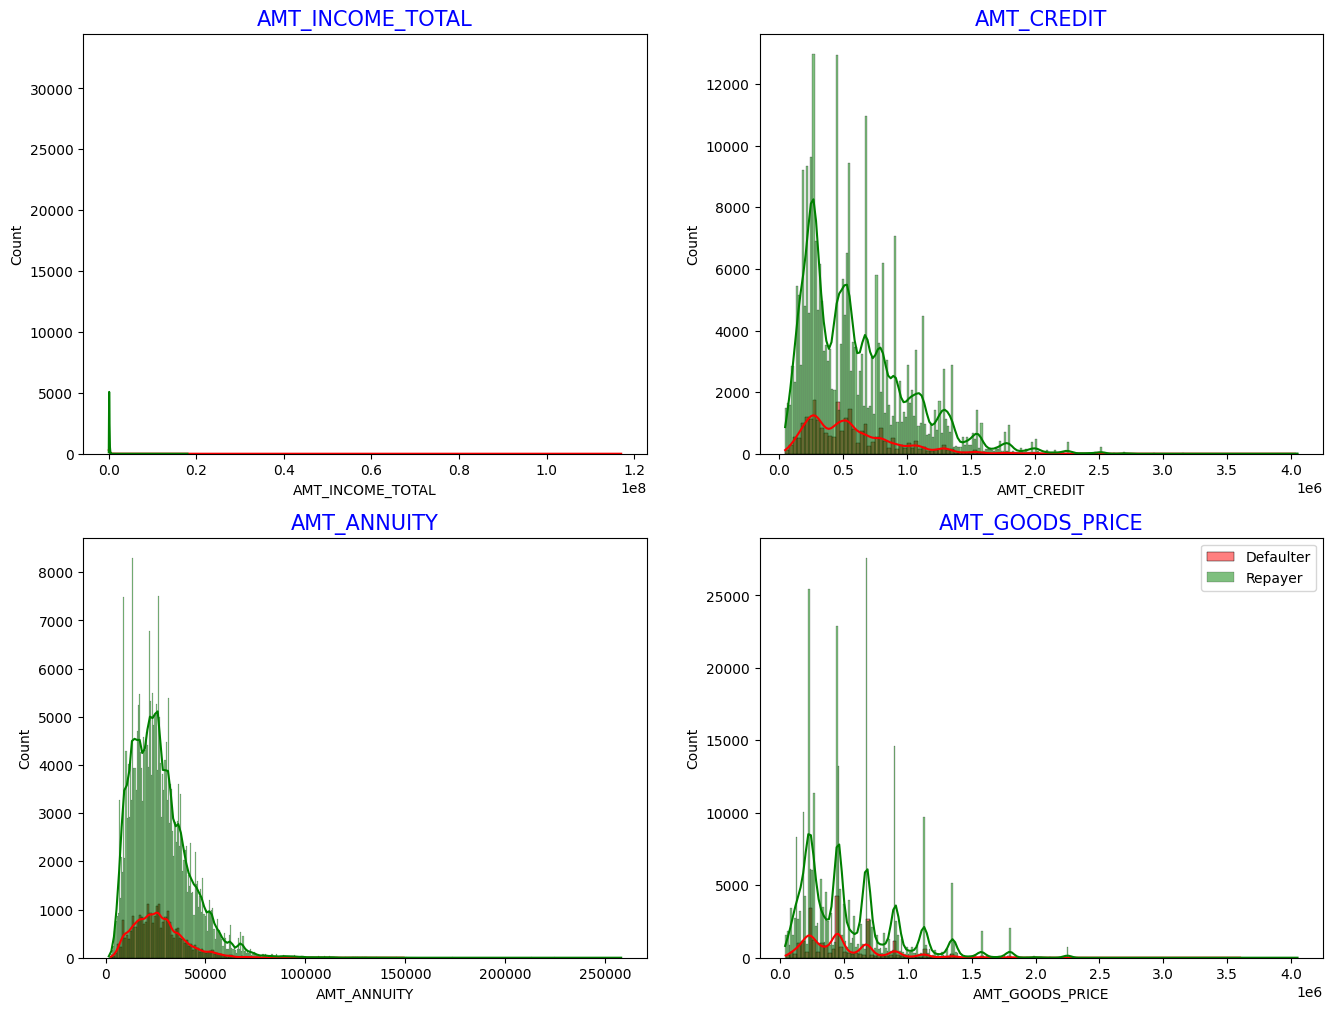

In [477]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = Application_Data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16, 12))

for i, column in enumerate(amount):
    plt.subplot(2, 2, i + 1)
    sns.histplot(Defaulter_df[column], color='r', label="Defaulter", kde=True)
    sns.histplot(Repayer_df[column], color='g', label="Repayer", kde=True)
    plt.title(column, fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})

plt.legend()
plt.show()


1.Most no of loans are given for goods price below 10 lakhs
2.Most people pay annuity below 50000 for the credit loan
3.The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision




<Figure size 1500x600 with 0 Axes>

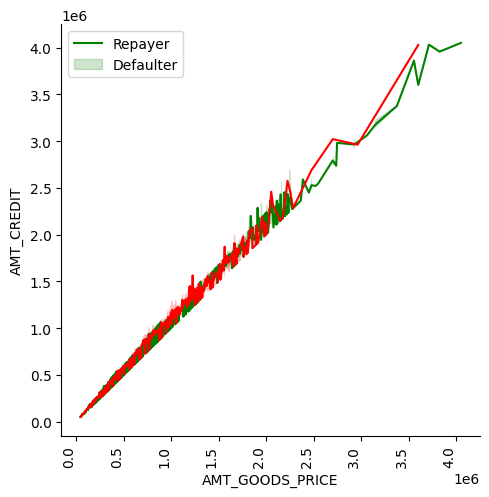

In [478]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',Application_Data,"TARGET", "line", ['g','r'], False,(15,6))

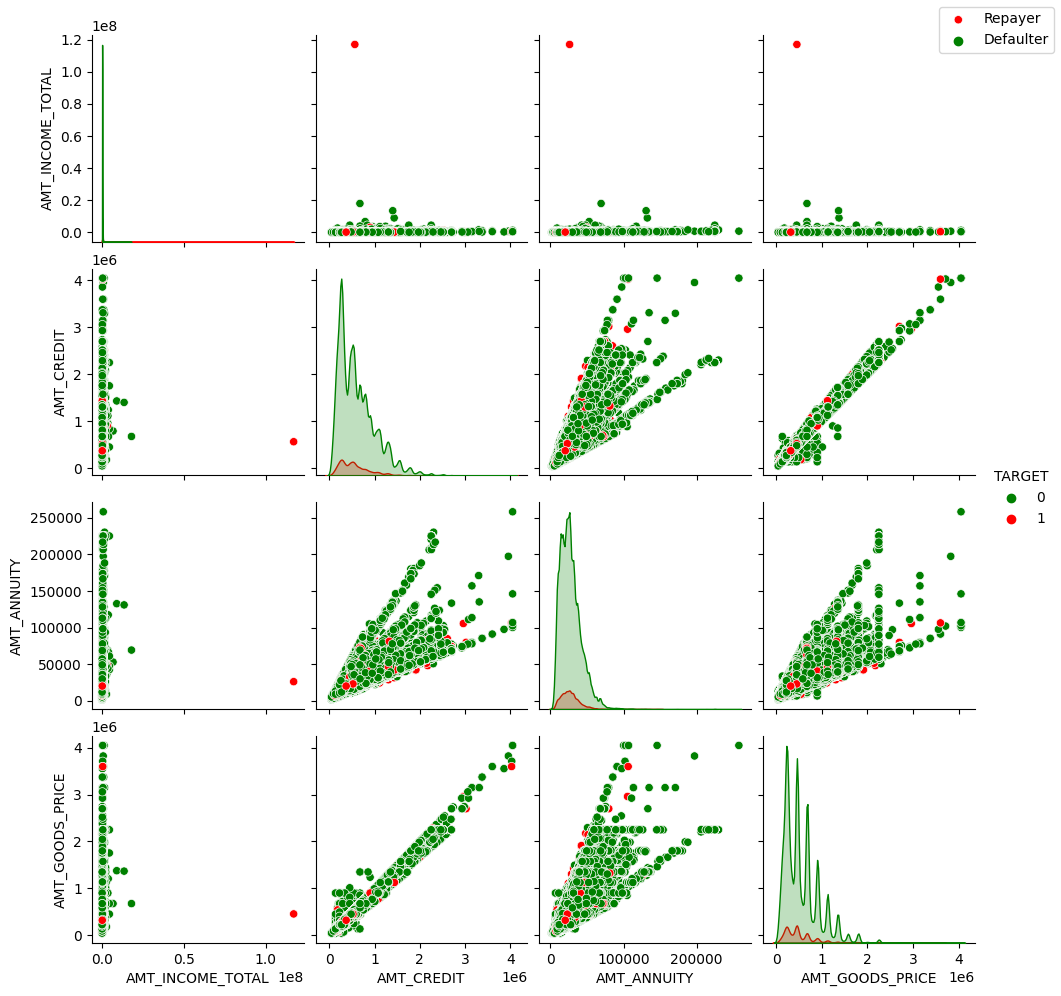

In [479]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

In [480]:
#joining both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(Application_Data, Previous_Application, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low


In [481]:
#Checking the details of the merged dataframe
loan_process_df.shape

(887347, 67)

In [482]:
# Checking the element count of the dataframe
loan_process_df.size

59452249

In [483]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887347 entries, 0 to 887346
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   887347 non-null  int64  
 1   TARGET                       887347 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         887347 non-null  object 
 3   CODE_GENDER                  887347 non-null  object 
 4   FLAG_OWN_CAR                 887347 non-null  object 
 5   FLAG_OWN_REALTY              887347 non-null  object 
 6   CNT_CHILDREN                 887347 non-null  int64  
 7   AMT_INCOME_TOTAL             887347 non-null  float64
 8   AMT_CREDIT_x                 887347 non-null  float64
 9   AMT_ANNUITY_x                887287 non-null  float64
 10  AMT_GOODS_PRICE_x            886608 non-null  float64
 11  NAME_TYPE_SUITE              887347 non-null  object 
 12  NAME_INCOME_TYPE             887347 non-null  object 
 13 

In [484]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,887347.000000,887347.000000,887347.000000,8.873470e+05,8.873470e+05,887287.000000,8.866080e+05,887347.000000,887347.000000,887347.000000,...,887347.000000,887347.000000,8.873470e+05,887347.000000,8.873470e+05,8.873470e+05,8.873470e+05,887347.000000,8.873470e+05,887347.000000
mean,278573.355245,0.086533,0.404863,1.735124e+05,5.875341e+05,27014.933342,5.276874e+05,0.020758,16316.688747,72698.338446,...,0.318782,2.688320,1.922461e+06,14795.547439,1.743646e+05,1.953514e+05,1.994569e+05,881.570688,3.200226e+02,12.536602
std,102862.966629,0.281150,0.716925,2.388415e+05,3.851740e+05,13958.001832,3.533979e+05,0.013363,4348.574147,143365.009447,...,0.968889,2.157655,5.330660e+05,13131.959867,2.919124e+05,3.179320e+05,2.804380e+05,783.545077,8.643867e+03,14.439936
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,1.000001e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,-1.000000e+00,0.000000
25%,189427.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16807.500000,2.385000e+05,0.010032,12726.000000,1041.000000,...,0.000000,1.000000,1.460106e+06,7376.085000,2.000250e+04,2.505600e+04,6.582994e+04,272.000000,-1.000000e+00,0.000000
50%,279118.000000,0.000000,0.000000,1.575000e+05,5.084955e+05,24907.500000,4.500000e+05,0.018850,16036.000000,2399.000000,...,0.000000,2.000000,1.923040e+06,11250.000000,7.071750e+04,8.048250e+04,1.115116e+05,584.000000,5.000000e+00,10.000000
75%,367786.000000,0.000000,1.000000,2.070000e+05,8.086500e+05,34537.500000,6.795000e+05,0.028663,19980.000000,6319.000000,...,0.000000,4.000000,2.384212e+06,16676.910000,1.800000e+05,2.126250e+05,1.800000e+05,1315.000000,8.900000e+01,16.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,3.956274e+06,220297.500000,3.825000e+06,0.072508,25201.000000,365243.000000,...,261.000000,25.000000,2.845381e+06,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,2922.000000,4.000000e+06,84.000000


In [485]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

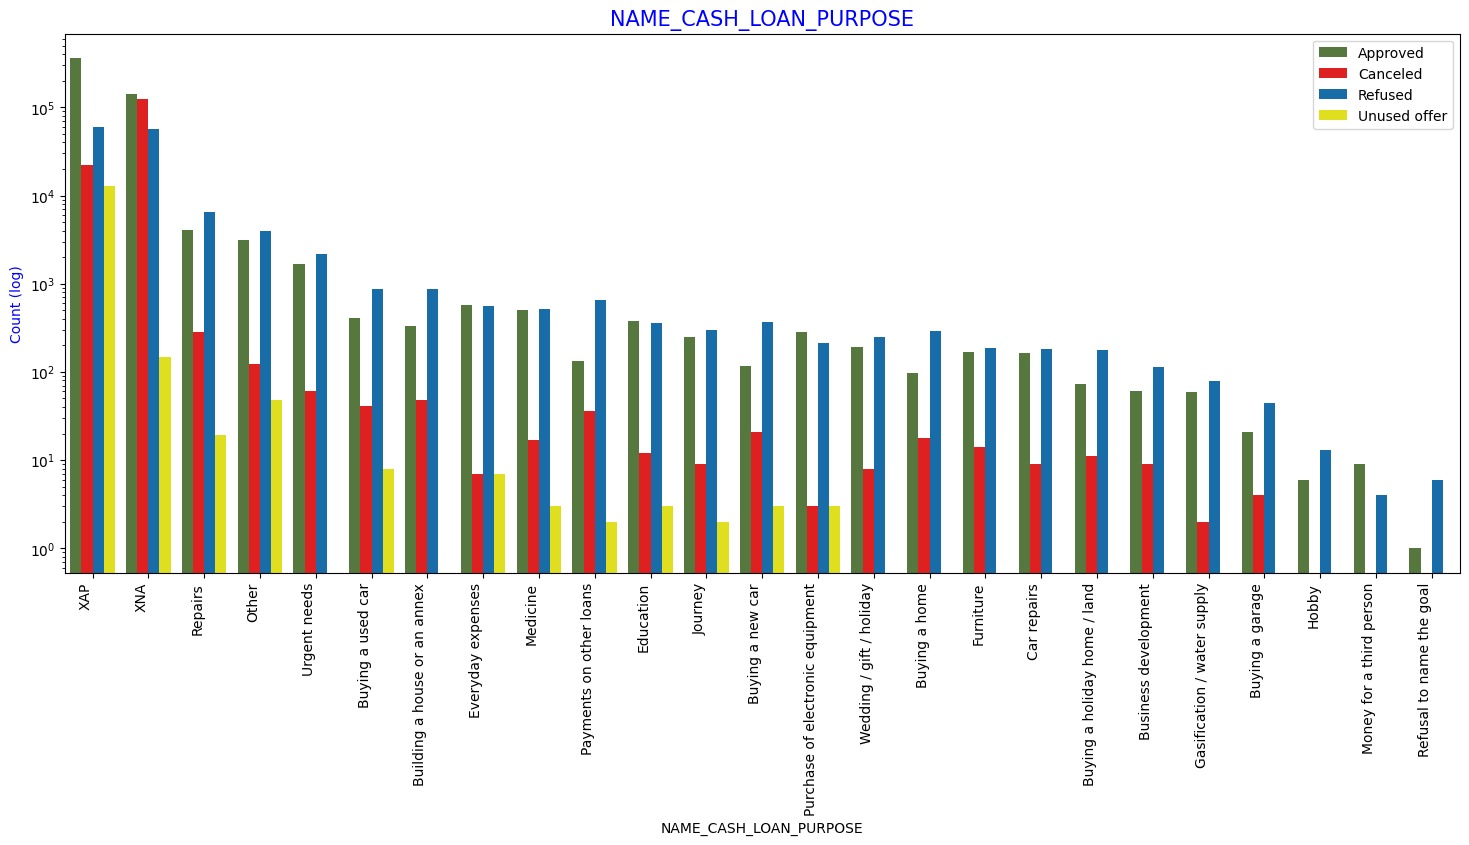

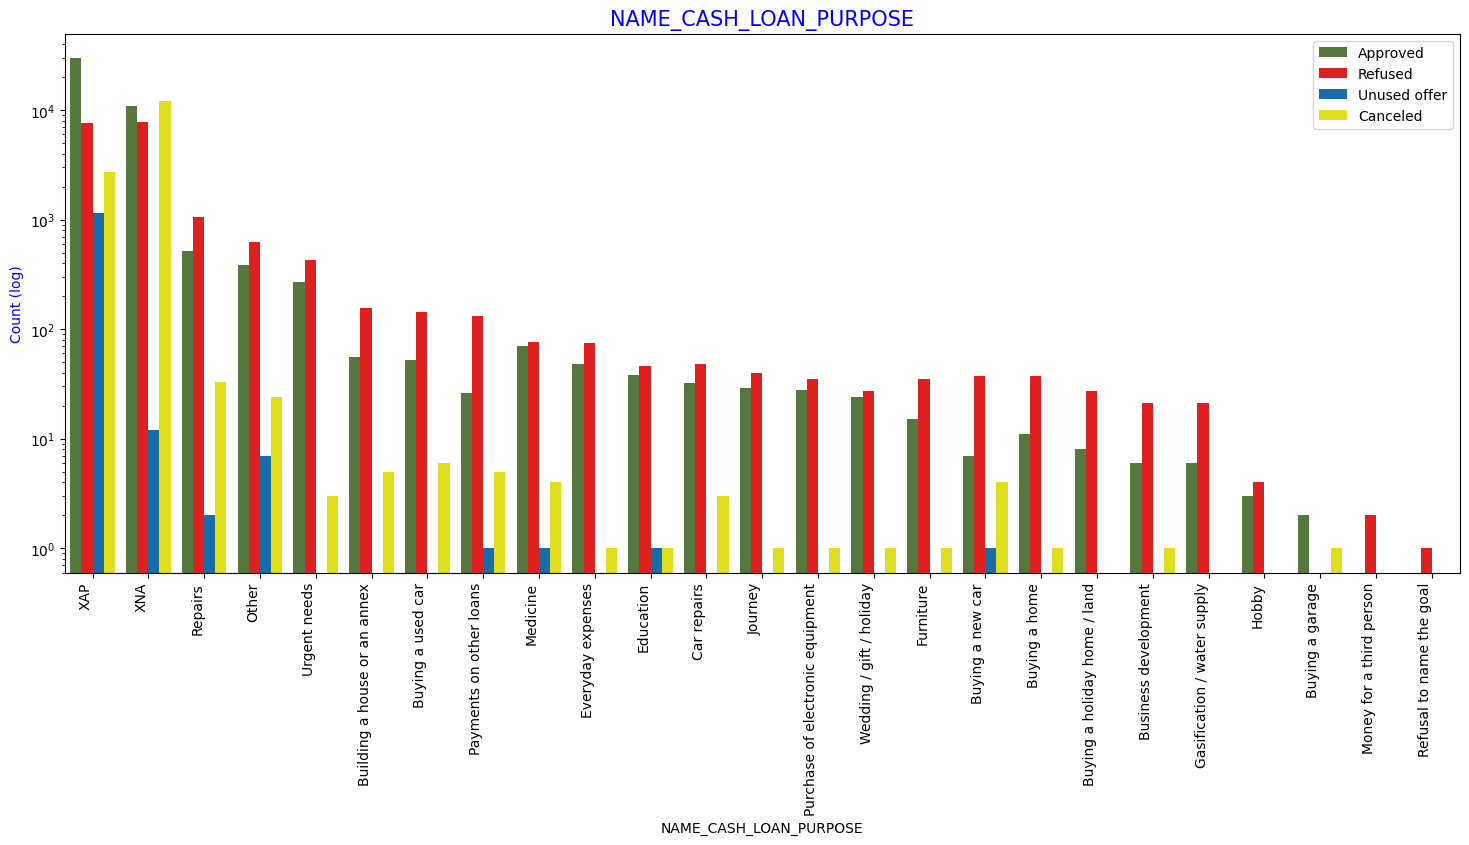

In [486]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

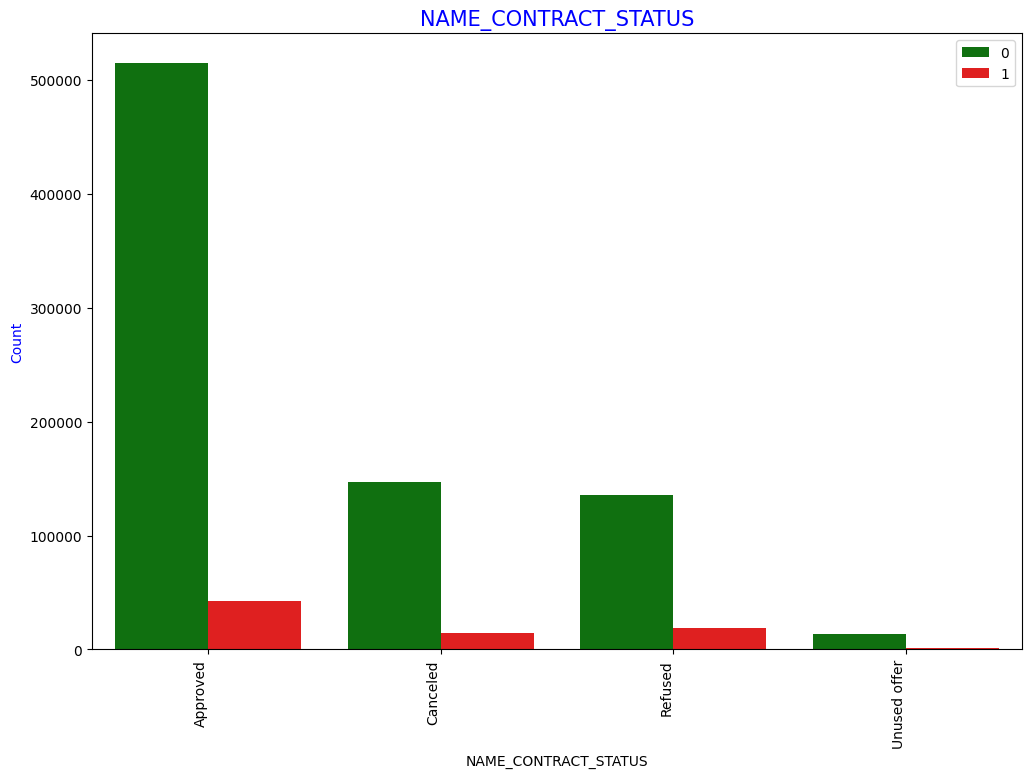

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       515220     92.41%
                     1        42313      7.59%
Canceled             0       146729     90.82%
                     1        14823      9.18%
Refused              0       135396      88.0%
                     1        18463      12.0%
Unused offer         0        13217     91.77%
                     1         1186      8.23%


In [487]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

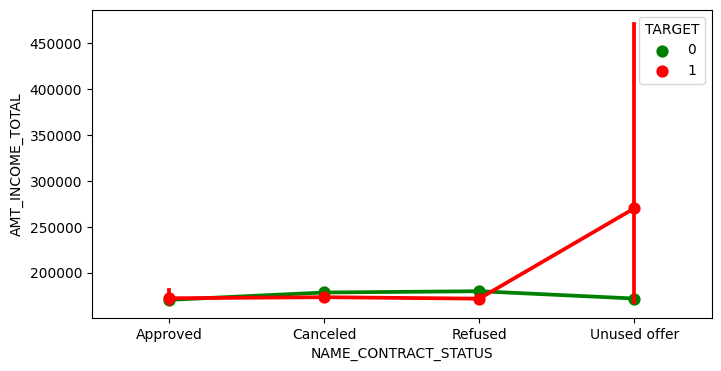

In [488]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')